In [27]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

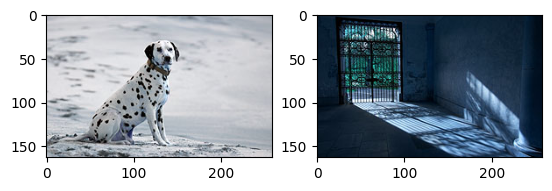

In [9]:
high = cv2.imread('hist_highkey.jpg')
low = cv2.imread('hist_lowkey.jpg')
plt.subplot(121)
plt.imshow(high)
plt.subplot(122)
plt.imshow(low)
plt.show()

(None, ([], []), ([], []))

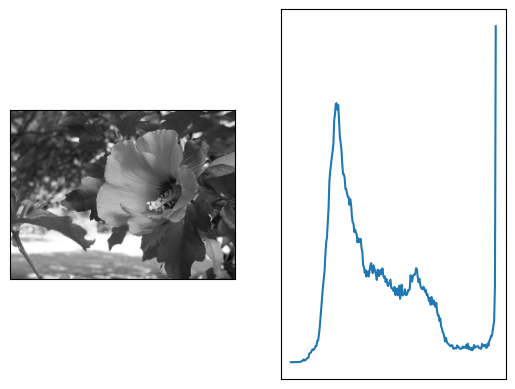

In [24]:
high = cv2.imread('Rose.jpg',2)
high_hist= cv2.calcHist([high], [0], None, [256], [0,256])
plt.figure()
plt.subplot(121)
plt.imshow(high, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.plot(high_hist)
plt.grid(False), plt.xticks([]), plt.yticks([])

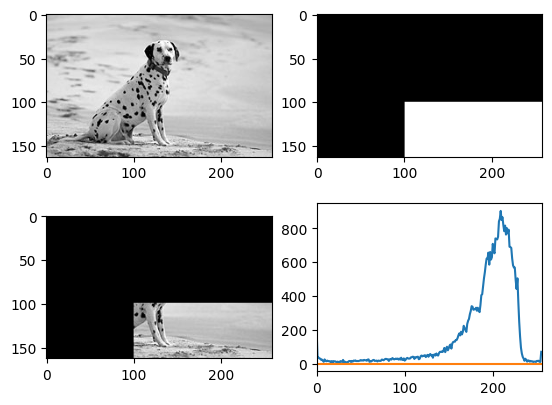

In [37]:
img = cv2.imread('hist_highkey.jpg',0) # create a mask
mask2= np.zeros(img.shape[:2], np.uint8)
mask2 [100:200, 100:300] = 255
masked_img = cv2.bitwise_and (img, img, mask = mask2)

hist_full = cv2.calcHist([img], [0], None, [256], [0,256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0,256])
plt.subplot(221)
plt.imshow(img, 'gray')

plt.subplot(222), plt.imshow(mask2, 'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full)
plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()



<BarContainer object of 256 artists>

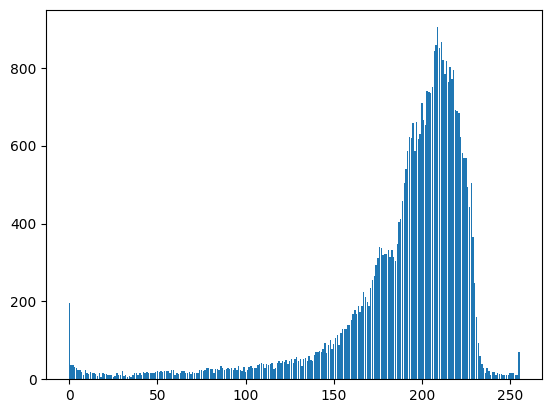

In [39]:
hist, bins = np.histogram (img, 256, [0,256])
# plt.plot(hist)
plt.bar(range(0, 256), hist)

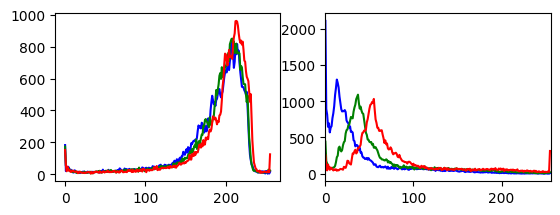

In [48]:
high_img = cv2.imread('hist_highkey.jpg')
low_img = cv2.imread('hist_lowkey.jpg')
color= ('b','g', 'r')
for channel, col in enumerate(color):
    high_hist = cv2.calcHist([high_img], [channel], None, [256], [0,256])
    low_hist = cv2.calcHist([low_img], [channel], None, [256], [0,256])
    plt.subplot(221)
    plt.plot(high_hist, color = col)
    plt.subplot(222)
    plt.plot(low_hist, color = col)
    plt.xlim([0,256])
plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x7c94a590f1f0>)

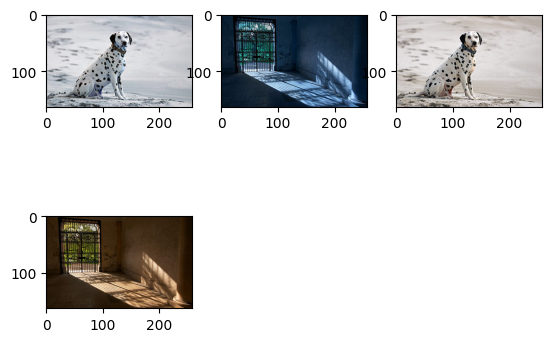

In [53]:
plt.subplot(231),plt.imshow(high_img)
plt.subplot(232),plt.imshow(low_img)
plt.subplot(233),plt.imshow(cv2.cvtColor(high_img, cv2.COLOR_BGR2RGB))
plt.subplot(234),plt.imshow(cv2.cvtColor(low_img, cv2.COLOR_BGR2RGB))

In [57]:
def get_histogram(image, low=0, high=255, num_bins=255, normalized=False):
    # Create bins for the histogram
    bins = np.linspace(low, high, num_bins + 1)  # Bin edges
    hist = np.zeros(num_bins, dtype='int64')  # Initialize histogram array

    # Calculate histogram
    for k in range(num_bins):
        if k == num_bins - 1:
            # Include upper bound for the last bin
            hist[k] = np.sum((image >= bins[k]) & (image <= bins[k + 1]))
        else:
            hist[k] = np.sum((image >= bins[k]) & (image < bins[k + 1]))

    # Normalize the histogram if required
    if normalized:
        bin_size = bins[1] - bins[0]  # Size of each bin
        hist = hist / (np.sum(hist) * bin_size)  # Normalize based on bin size

    # Validate using NumPy's built-in histogram
    np_hist, np_bins = np.histogram(image.flatten(), bins=num_bins, range=[low, high], density=normalized)

    for k, _ in enumerate(hist):
        assert np.isclose(hist[k], np_hist[k]), f'Something is wrong in bin index {k}'

    return bins, hist


[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[0 1 2 3 3 2 1 0 0 0]


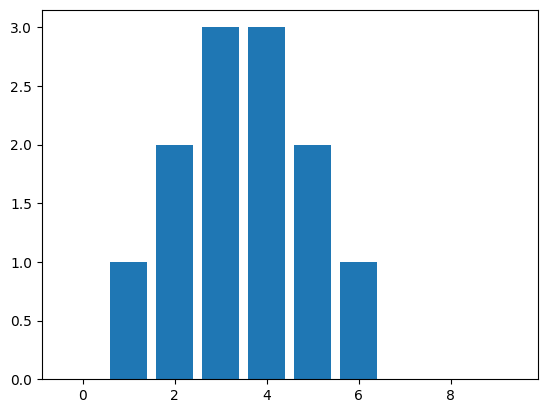

In [58]:
test_im = np.array([[1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6]])
bins, hist = get_histogram (test_im, 0, 10, 10, False)
print(test_im)
print(bins)
print(hist)
plt.bar(range(0, 10), hist)
plt.show()

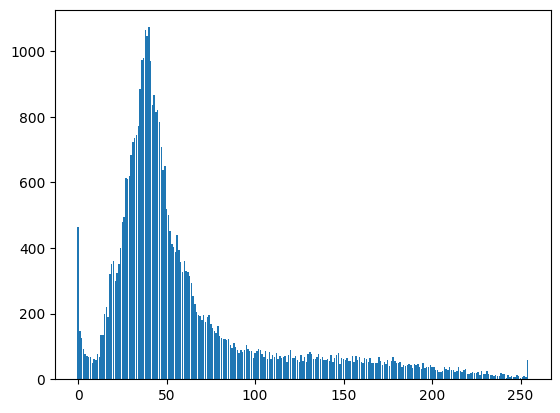

In [60]:
img = cv2.imread('hist_lowkey.jpg',cv2.IMREAD_GRAYSCALE)
bins, hist1 = get_histogram (img, 0, 255, 255, False)
plt.bar(range(0, 255), hist1)
plt.show()

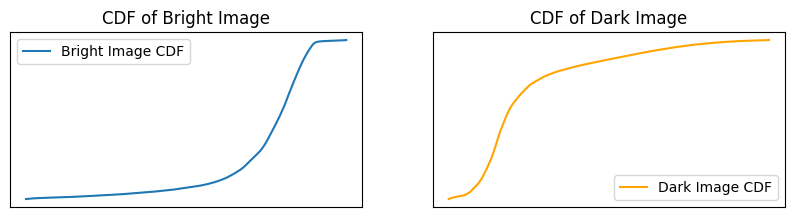

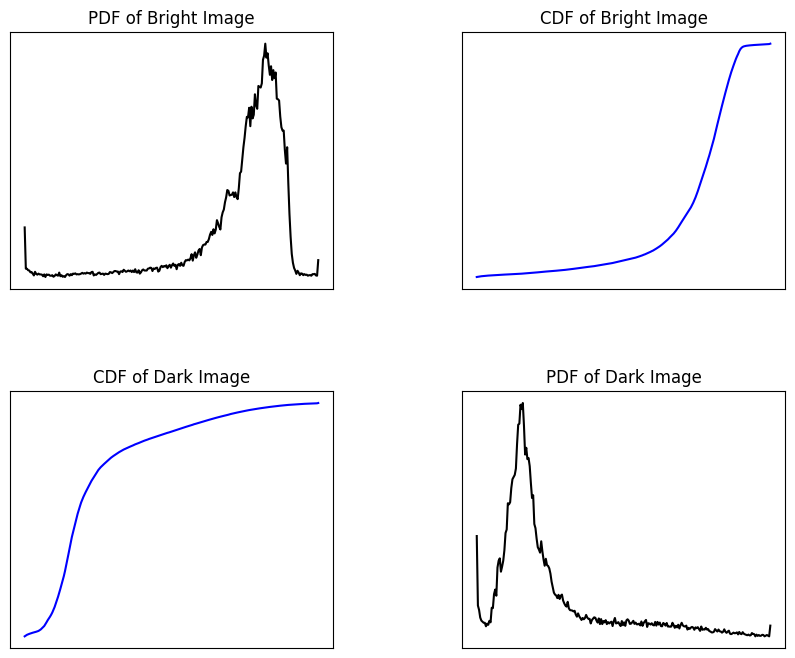

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load high and low contrast images in grayscale
high = cv2.imread('hist_highkey.jpg', 0)
low = cv2.imread('hist_lowkey.jpg', 0)

# Compare histograms of high and low contrast images
hist_high, _ = np.histogram(high, bins=256, range=(0, 256))
hist_low, _ = np.histogram(low, bins=256, range=(0, 256))

# Compute cumulative distribution function (CDF)
cdf_high = hist_high.cumsum()
cdf_low = hist_low.cumsum()

# Normalize the CDFs for better visualization
cdf_high = cdf_high / cdf_high[-1]
cdf_low = cdf_low / cdf_low[-1]

# Plot cumulative histograms
plt.figure(figsize=(10, 5))

plt.subplot(221)
plt.plot(cdf_high, label='Bright Image CDF')
plt.title('CDF of Bright Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.legend()

plt.subplot(222)
plt.plot(cdf_low, label='Dark Image CDF', color='orange')
plt.title('CDF of Dark Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.legend()

plt.show()
import matplotlib.pyplot as plt

# Plot PDF and CDF for high and low contrast images
plt.figure(figsize=(10, 8))

# PDF of bright image (high contrast)
plt.subplot(221)
plt.plot(hist_high, 'k')
plt.title('PDF of Bright Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# CDF of bright image (high contrast)
plt.subplot(222)
plt.plot(cdf_high, 'b')
plt.title('CDF of Bright Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# CDF of dark image (low contrast)
plt.subplot(223)
plt.plot(cdf_low, 'b')
plt.title('CDF of Dark Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# PDF of dark image (low contrast)
plt.subplot(224)
plt.plot(hist_low, 'k')
plt.title('PDF of Dark Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Adjust the placement of subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing between subplots
plt.show()


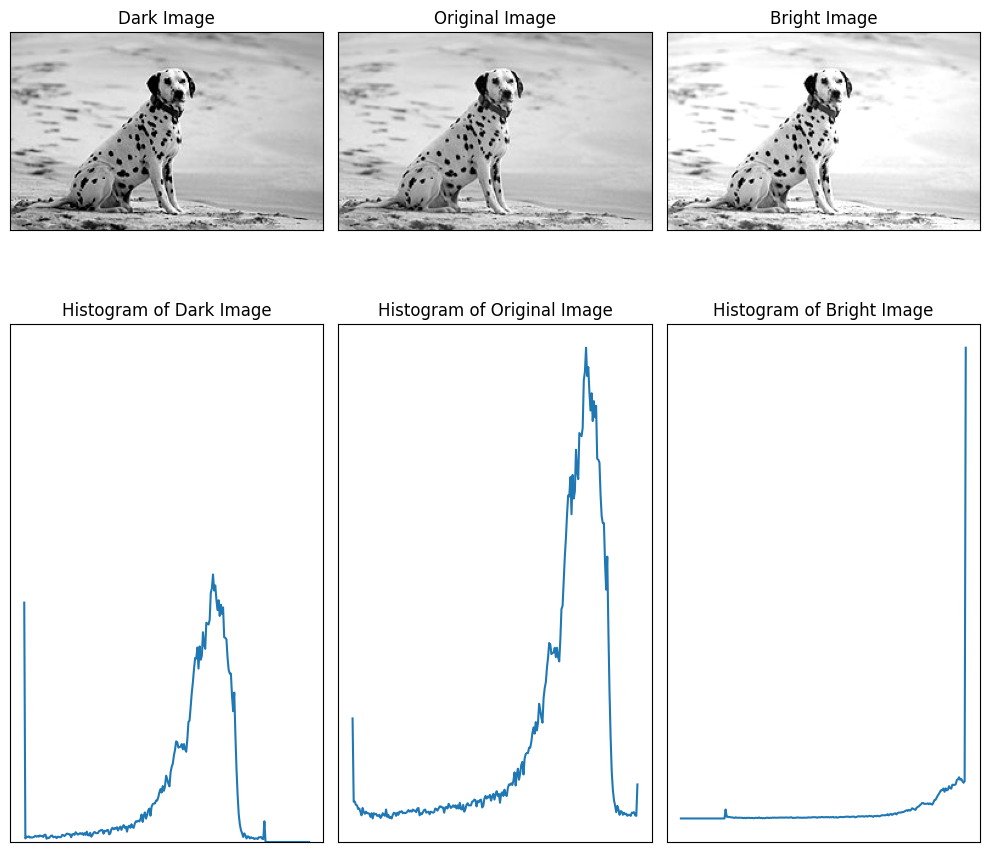

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to manipulate image brightness
def manip_image(image, alpha, beta):
    new_image = np.zeros(image.shape, image.dtype)  # Create an empty image
    for x in range(image.shape[0]):  # Loop over rows
        for y in range(image.shape[1]):  # Loop over columns
            # Adjust brightness and contrast, ensuring pixel values remain within valid range
            new_image[x, y] = np.clip(alpha * image[x, y] + beta, 0, 255)
    return new_image

# Test the function on an image
img = cv2.imread('hist_highkey.jpg', 0)  # Load grayscale image
bright = manip_image(img, 1, 40)  # Brightened image (beta = 40)
dark = manip_image(img, 1, -40)  # Darkened image (beta = -40)

# Compare the results visually and with histograms
plt.figure(figsize=(10, 10))

# Display darkened image
plt.subplot(231)
plt.imshow(dark, cmap='gray')
plt.title('Dark Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Display original image
plt.subplot(232)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Display brightened image
plt.subplot(233)
plt.imshow(bright, cmap='gray')
plt.title('Bright Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Histogram of darkened image
plt.subplot(234)
plt.plot(cv2.calcHist([dark], [0], None, [256], [0, 256]))
plt.title('Histogram of Dark Image')
plt.ylim((0, 1750))
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Histogram of original image
plt.subplot(235)
plt.plot(cv2.calcHist([img], [0], None, [256], [0, 256]))
plt.title('Histogram of Original Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Histogram of brightened image
plt.subplot(236)
plt.plot(cv2.calcHist([bright], [0], None, [256], [0, 256]))
plt.title('Histogram of Bright Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()


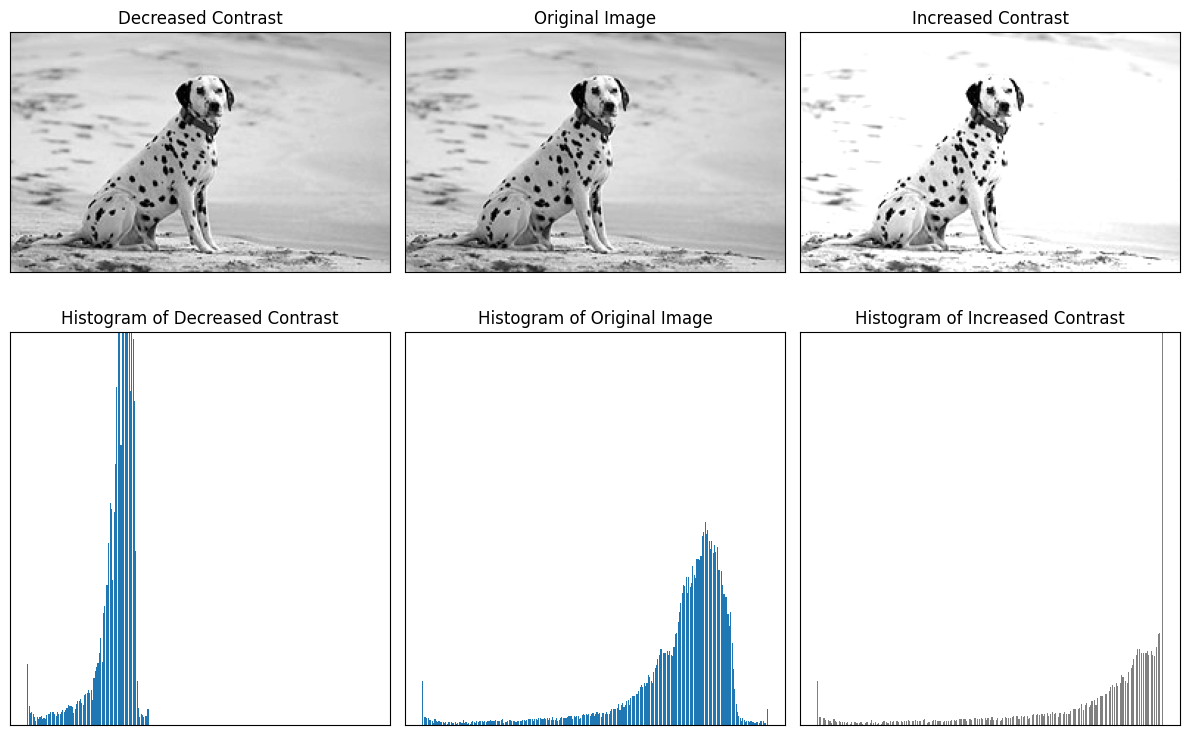

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to manipulate image contrast
def manip_image(image, alpha, beta):
    new_image = np.zeros(image.shape, image.dtype)  # Create an empty image
    for x in range(image.shape[0]):  # Loop over rows
        for y in range(image.shape[1]):  # Loop over columns
            # Adjust contrast and brightness, ensuring pixel values remain valid
            new_image[x, y] = np.clip(alpha * image[x, y] + beta, 0, 255)
    return new_image

# Load the grayscale image
img = cv2.imread('hist_highkey.jpg', 0)

# Test contrast manipulation
increase_contrast = manip_image(img, 1.35, 0)  # Increase contrast
decrease_contrast = manip_image(img, 0.35, 0)  # Decrease contrast

# Compare the results
plt.figure(figsize=(12, 8))

# Display decreased contrast image
plt.subplot(231)
plt.imshow(decrease_contrast, cmap='gray')
plt.title('Decreased Contrast')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Display original image
plt.subplot(232)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Display increased contrast image
plt.subplot(233)
plt.imshow(increase_contrast, cmap='gray')
plt.title('Increased Contrast')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Histogram of decreased contrast image
plt.subplot(234)
plt.bar(
    range(256),
    cv2.calcHist([decrease_contrast], [0], None, [256], [0, 256]).ravel()
)
plt.title('Histogram of Decreased Contrast')
plt.ylim((0, 1750))
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Histogram of original image
plt.subplot(235)
plt.bar(
    range(256),
    cv2.calcHist([img], [0], None, [256], [0, 256]).ravel(),

)
plt.title('Histogram of Original Image')
plt.ylim((0, 1750))
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Histogram of increased contrast image
plt.subplot(236)
plt.bar(
    range(256),
    cv2.calcHist([increase_contrast], [0], None, [256], [0, 256]).ravel(),
    color='gray'
)
plt.title('Histogram of Increased Contrast')
plt.ylim((0, 1750))
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()


# **Linear Transformation**

Input image info:
Data type:  uint8
Min intensity value:  0
Max intensity value:  255
Mean:  62.48637466114995
Standard deviation:  48.694622445571696


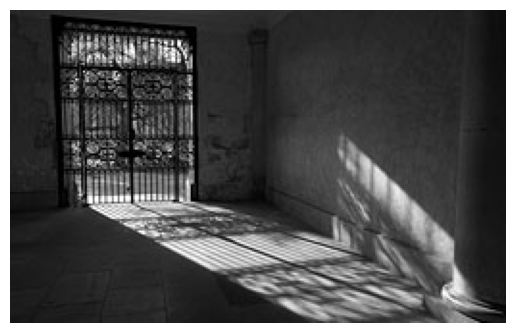

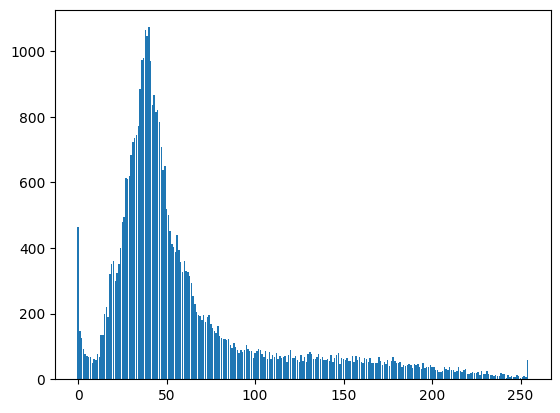

In [71]:
im = cv2.imread('hist_lowkey.jpg',cv2.IMREAD_GRAYSCALE)
bins, hist_im = get_histogram(im)
print('Input image info:')
print('Data type: ', im.dtype)
print('Min intensity value: ', im.min())
print('Max intensity value: ', im.max())
print('Mean: ', np.mean (im))
1
print('Standard deviation: ', np.std(im))
plt.figure(0)
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.figure(1)
plt.bar(range(0,255), hist_im)
plt.show()

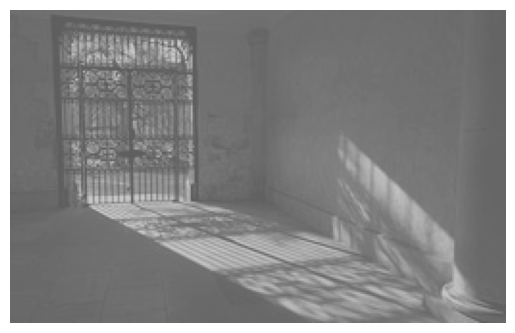

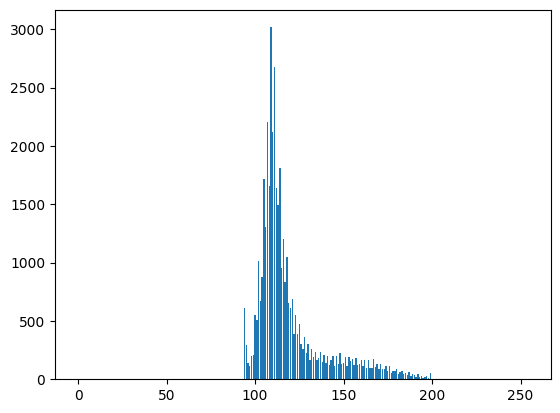

Transformed image info:
Data type:  float64
Min intensity value:  94.33541055544933
Max intensity value:  199.06976814699885
Mean:  120.0
Standard deviation:  20.0
42054


In [75]:
target_mean = 120
target_stddev = 20
input_mean = np.mean (im)
input_stddev = np.std(im)

a =target_stddev / input_stddev
b= target_mean -a *input_mean
transformed_im= b + a *im
transformed_im= transformed_im - transformed_im* (transformed_im < 0) - transformed_im* (transformed_im > 255)
bins, hist = get_histogram (transformed_im)


plt.figure(3)
plt.imshow(transformed_im, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.figure(4)
plt.bar(range(0,255), hist)
plt.show()
print('Transformed image info:')
print('Data type: ', transformed_im.dtype)
print('Min intensity value: ', transformed_im.min())
print('Max intensity value: ', transformed_im.max())
print('Mean: ', np.mean (transformed_im))
print('Standard deviation: ', np.std(transformed_im))
print(im.size)


In [77]:
height, width = im.shape
print(f"Image size: {width}x{height}")


Image size: 258x163
